In [5]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine, text
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
credentials = "../credentials.json"

with open(credentials) as f:
    creds = json.load(f)

engine = create_engine(f'postgresql://{creds["user"]}:{creds["password"]}@{creds["host"]}:{creds["port"]}/{creds["database"]}')

In [10]:
df_hired = pd.read_sql('SELECT * FROM public."candidates_wkshop_EDA";', engine)

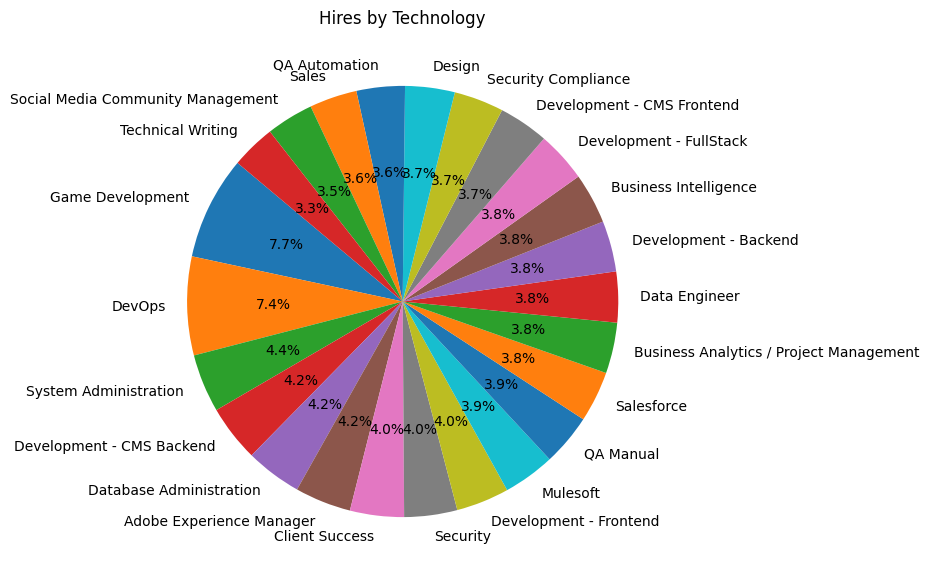

In [13]:
# Visualization 1: Hires by Technology (Pie Chart)
tech_counts = df_hired['Technology'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(tech_counts, labels=tech_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Hires by Technology')
plt.show()

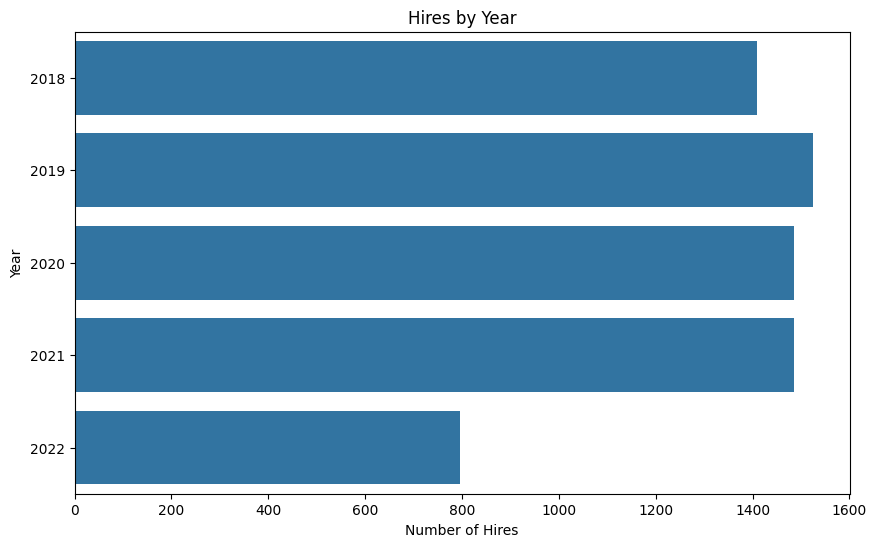

In [14]:
# Visualization 2: Hires by Year (Horizontal Bar Chart)
df_hired['Year'] = df_hired['Application Date'].dt.year
year_counts = df_hired['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.values, y=year_counts.index, orient='h')
plt.title('Hires by Year')
plt.xlabel('Number of Hires')
plt.ylabel('Year')
plt.show()

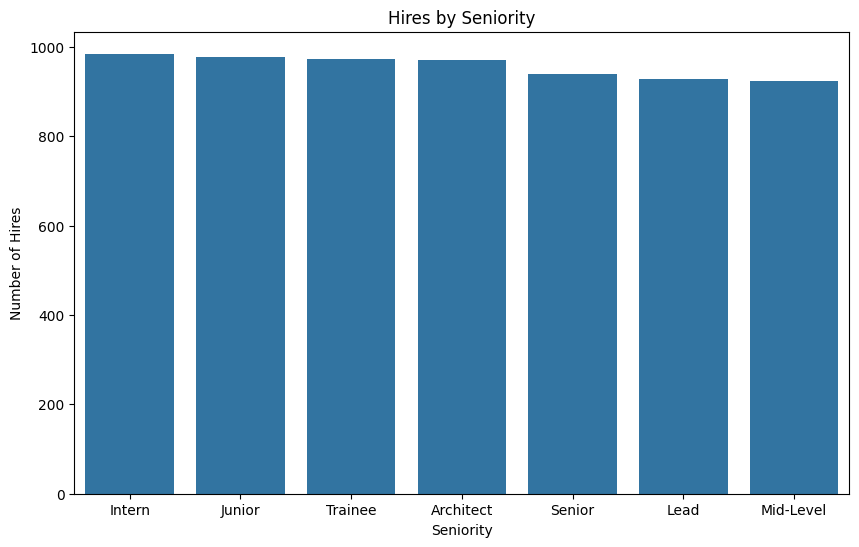

In [15]:
# Visualization 3: Hires by Seniority (Bar Chart)
seniority_counts = df_hired['Seniority'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=seniority_counts.index, y=seniority_counts.values)
plt.title('Hires by Seniority')
plt.xlabel('Seniority')
plt.ylabel('Number of Hires')
plt.show()

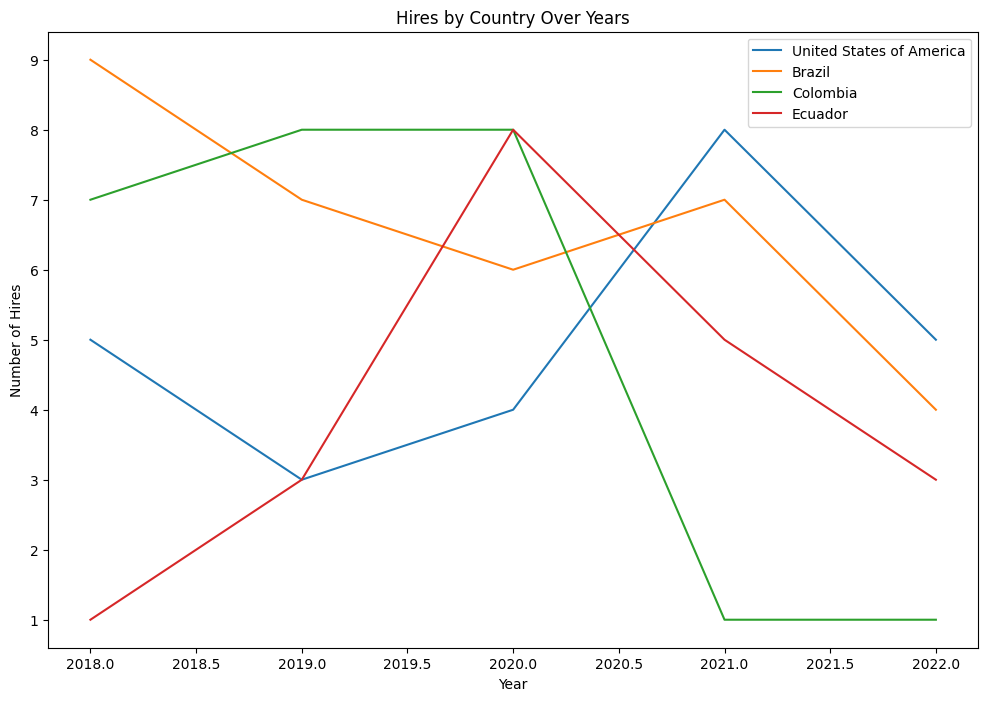

In [18]:
# Visualization 4: Hires by Country Over Years (Multiline Chart)
countries = ['United States of America','Brazil', 'Colombia', 'Ecuador']
df_filtered = df_hired[df_hired['Country'].isin(countries)]
country_year_counts = df_filtered.groupby(['Country', 'Year']).size().unstack()

plt.figure(figsize=(12, 8))
for country in countries:
    plt.plot(country_year_counts.columns, country_year_counts.loc[country], label=country)

plt.title('Hires by Country Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.legend()
plt.show()